# 导入相关依赖库

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 导入数据

In [2]:
data_train = np.genfromtxt('glass.data', delimiter=',', comments='|', dtype=str)
data_test = np.genfromtxt('glass.test', delimiter=',', comments='|', dtype=str)

# 数据预处理模块

In [3]:
def Normalized(arr):
    arr = arr.astype(float)
    normalized_arr = (arr - arr.min(axis=0)) / (arr.max(axis=0) - arr.min(axis=0))
    return normalized_arr

def Bina_class(arr):
    for i in range(len(arr[:, -1])):
        if arr[i, -1] == ' building_windows_float_processed.' or arr[i, -1] == ' vehicle_windows_float_processed.':
            arr[i, -1] = 1
        else:
            arr[i, -1] = 0
    return arr

In [4]:
X_train, X_test = Normalized(data_train[:, : -1]), Normalized(data_test[:, : -1])
y_train_multi, y_test_multi = data_train[:, -1], data_test[:, -1]
y_train_bina, y_test_bina = Bina_class(data_train.copy())[:, -1], Bina_class(data_test.copy())[:, -1]

# 比较同一算法在两分类和多分类问题中的效果

## 比较决策树算法在两分类和多分类问题中的效果

In [5]:
dt_clf_bina = DecisionTreeClassifier(random_state=42)
dt_clf_bina.fit(X_train, y_train_bina)
y_pred_bina = dt_clf_bina.predict(X_test)
dt_accuracy_bina = accuracy_score(y_test_bina, y_pred_bina)

In [6]:
dt_clf_multi = DecisionTreeClassifier(random_state=42)
dt_clf_multi.fit(X_train, y_train_multi)
y_pred_multi = dt_clf_multi.predict(X_test)
dt_accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)

## 比较随机森林算法在两分类和多分类问题中的效果

In [7]:
rf_classifier_bina = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_bina.fit(X_train, y_train_bina)
y_pred_bina = rf_classifier_bina.predict(X_test)
rf_accuracy_bina = accuracy_score(y_test_bina, y_pred_bina)

In [8]:
rf_classifier_multi = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_multi.fit(X_train, y_train_multi)
y_pred_multi = rf_classifier_multi.predict(X_test)
rf_accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)

## 比较AdaBoost算法在两分类和多分类问题中的效果

In [9]:
ada_clf_bina = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf_bina.fit(X_train, y_train_bina)
y_pred_bina = ada_clf_bina.predict(X_test)
ada_accuracy_bina = accuracy_score(y_test_bina, y_pred_bina)

C:\Users\10391\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [10]:
ada_clf_multi = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf_multi.fit(X_train, y_train_multi)
y_pred_multi = ada_clf_multi.predict(X_test)
ada_accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)

C:\Users\10391\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## 比较GradientBoosting算法在两分类和多分类问题中的效果

In [11]:
gbdt_classifier_bina = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt_classifier_bina.fit(X_train, y_train_bina)
y_pred_bina = gbdt_classifier_bina.predict(X_test)
gbdt_accuracy_bina = accuracy_score(y_test_bina, y_pred_bina)

In [12]:
gbdt_classifier_multi = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt_classifier_multi.fit(X_train, y_train_multi)
y_pred_multi = gbdt_classifier_multi.predict(X_test)
gbdt_accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)

## 比较Xgboost算法在两分类和多分类问题中的效果

In [13]:
model_bina = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_bina.fit(X_train, y_train_bina.astype(int))
y_pred_bina = model_bina.predict(X_test)
xgb_accuracy_bina = accuracy_score(y_test_bina.astype(int), y_pred_bina)

In [14]:
num_array = list(range(len(set(y_train_multi))))
y_item = list(set(y_train_multi))
mapping = {y_item[0]: num_array[0], y_item[1]: num_array[1], y_item[2]: num_array[2], y_item[3]: num_array[3], y_item[4]: num_array[4], y_item[5]: num_array[5]}
y_train_numeric_list = [mapping[item] for item in y_train_multi if item in mapping]
y_test_numeric_list = [mapping[item] for item in y_test_multi if item in mapping]
model = xgb.XGBClassifier(objective='multi:softmax', num_class=X_train.shape[1], n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train_numeric_list)
y_pred_multi = model.predict(X_test)
xgb_accuracy_multi = accuracy_score(y_test_numeric_list, y_pred_multi)

## 结果可视化

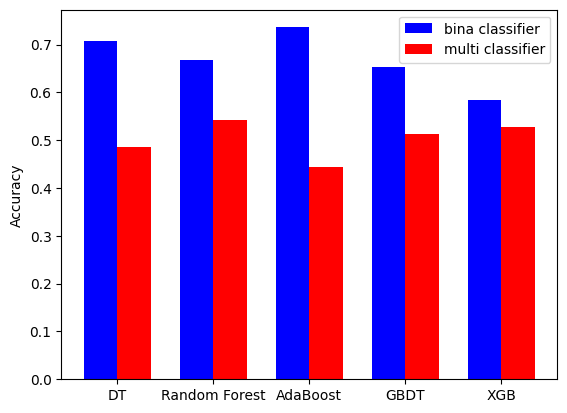

In [15]:
x = ['DT', 'Random Forest', 'AdaBoost', 'GBDT', 'XGB']
bina_accuracy = [dt_accuracy_bina, rf_accuracy_bina, ada_accuracy_bina, gbdt_accuracy_bina, xgb_accuracy_bina]
multi_accuracy = [dt_accuracy_multi, rf_accuracy_multi, ada_accuracy_multi, gbdt_accuracy_multi, xgb_accuracy_multi]
bar_width = 0.35
index = np.arange(len(x))
plt.bar(index, bina_accuracy, bar_width, label='bina classifier', color='blue')
plt.bar(index + bar_width, multi_accuracy, bar_width, label='multi classifier', color='red')
plt.legend()
plt.ylabel('Accuracy')
plt.xticks(index + bar_width / 2, x)
plt.show()

# 使用soft、hard方法分别集成多个不同的基本分类器，分析比较结果(以多分类任务为例)

In [16]:
clf1 = DecisionTreeClassifier(random_state=2)
clf2 = SVC(probability=True, random_state=42)
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)

In [17]:
clf1.fit(X_train, y_train_multi)
y_pred_dt = clf1.predict(X_test)
dt_accuracy = accuracy_score(y_test_multi, y_pred_dt)

In [18]:
clf2.fit(X_train, y_train_multi)
y_pred_SVC = clf2.predict(X_test)
SVC_accuracy = accuracy_score(y_test_multi, y_pred_SVC)

In [19]:
clf3.fit(X_train, y_train_multi)
y_pred_rf = clf3.predict(X_test)
rf_accuracy = accuracy_score(y_test_multi, y_pred_rf)

In [20]:
soft_voting_clf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('rf', clf3)], voting='soft')
soft_voting_clf.fit(X_train, y_train_multi)
y_pred_soft = soft_voting_clf.predict(X_test)
soft_accuracy = accuracy_score(y_test_multi, y_pred_soft)

In [21]:
hard_voting_clf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('rf', clf3)], voting='hard')
hard_voting_clf.fit(X_train, y_train_multi)
y_pred_hard = hard_voting_clf.predict(X_test)
hard_accuracy = accuracy_score(y_test_multi, y_pred_hard)

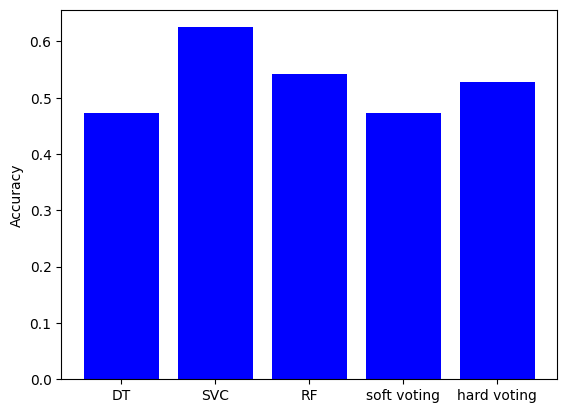

In [22]:
x = ['DT', 'SVC', 'RF', 'soft voting', 'hard voting']
y = [dt_accuracy, SVC_accuracy, rf_accuracy, soft_accuracy, hard_accuracy]
plt.bar(x, y, color='blue')
plt.ylabel('Accuracy')
plt.show()

# 加权集成

In [23]:
clf1 = DecisionTreeClassifier(random_state=2)
clf2 = SVC(probability=True, random_state=42)
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
scores = [cross_val_score(estimator, X_train, y_train_multi, scoring='accuracy') for estimator in [clf1, clf2, clf3]]
sum_of_elements = [np.sum(array) for array in scores]
weights = [element / sum(sum_of_elements) for element in sum_of_elements]
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('svc', clf2), ('dt', clf3)], voting='soft', weights=weights)
voting_clf.fit(X_train, y_train_multi)
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test_multi, y_pred_voting)

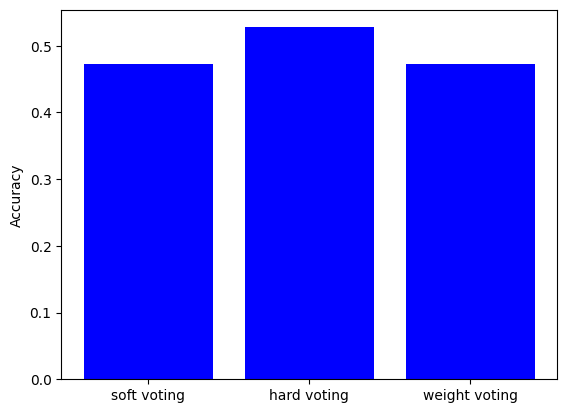

In [24]:
x = ['soft voting', 'hard voting', 'weight voting']
y = [soft_accuracy, hard_accuracy, voting_accuracy]
plt.bar(x, y, color='blue')
plt.ylabel('Accuracy')
plt.show()